# Numpy and  Data Transformations 


We will be looking at a number of common operations and calculations here,  all making use of numpy

Two things to look for here

-How was numpy used in these calculations  

-What are standardization and normalization




In [1]:
import numpy as np

### Centered Data

One common approach to data is to work with centered data,  which means to subtract the mean value from a variable, or a 
set of variables.

if x is a varialbe, then the centered version of x is xc, where

    xc=x-mean(x)

This does not alter the variance,   var(x)=var(xc)

here's an example

Note that these are all numby based variables and we can use member functions of the np arrays to do the calculations

In [2]:
x=np.random.normal(2,2, 20)

xc= x-x.mean()

print(x.var())
print(xc.var())

print(xc.mean())
print(x.mean())

3.4678896656758433
3.4678896656758424
-7.327471962526033e-16
2.223023042815128


Variance

I typically think of variance as

Variance is 1/(n-1) x sum(  (x-mean(x))^2)

Notice this is also 1/(n-1) sum (xc^2)

When mean(x) is estimated from data, the value (n-1) is the number of degrees of freedom in the measurements after the mean(x) is estimated

Some software (including numpy,  it looks like)  calculates variance as

1/(n) x sum(  (x-mean(x))^2)

We can write this in matrix form as  1/(n) xc * xc.T

To write out this calculation,  we can use np.matmul to multiple the two matrics and then use xc.shape[0] to get n, the length of the data.   x.shape gives us a response like (20,3) so xc.shape gives us the number of rows in xc, which is n

Be a bit aware of the two ways to calculate variance

Below is the approach to calculating variance based on matrix multiplication of a centered matrix

In [3]:
np.matmul(xc,xc.T)/(xc.shape[0])

3.4678896656758424

Regression with Centered Matrices

In a regression model, like the simple one below

    y=mx+b
    
we say that x predicts y

notice that mean(y)= m * mean(x) +b

so yc = y-mean(y)= (mx+b) -m* (mean(x)+b)

and 

    yc= mx- m* mean(x)

so that

    yc= m xc
    
This means that the equation  y=mx+b is equal to yc = m xc,   

The dependence of y on x and yc on mx stays the same,  if x is good predictor of y,  then so is xc, the only thing that
changes is the value of b

If we work with yc and xc,  that intercept is going to be zero.  This can greatly simplify calculations,  


Let's generate a faked data set to see this, and think about the implications

In [8]:
# create a set of x values

x=np.arange(-2,10,0.5)
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,
        9. ,  9.5])

In [6]:
# set up y with an error term

y=3.5*x-4 +np.random.normal(0, 1, x.shape)
y

array([-10.68216309,  -8.49838372,  -7.89514982,  -5.29037622,
        -2.86339097,  -2.71506413,   0.25310282,   0.62846127,
         2.88409625,   4.86949605,   8.46290314,   9.11487505,
        11.73887071,  13.6983276 ,  12.31646343,  15.71878291,
        16.64108892,  18.71304787,  20.31097636,  22.96394337,
        22.96410755,  23.30941967,  28.05740774,  27.62124936])

Note what i did here was to create a generative model

We can use models to predict, to analyze relationships, detect anomalies, etc

This is a generative use of a model, to create synthetic data,   it is also called a Monte Carlo model

We can use it for various types of testing,  you'll see this tactic again

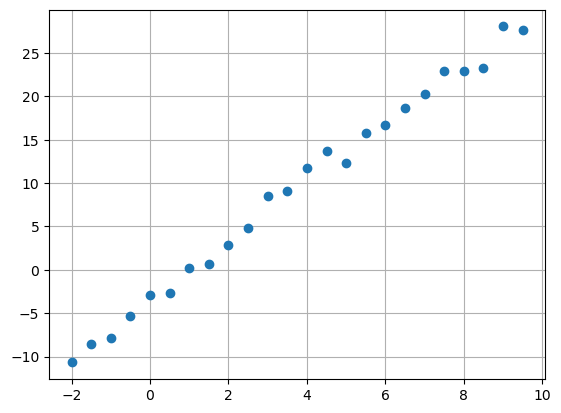

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(x,y,'o')
plt.grid()

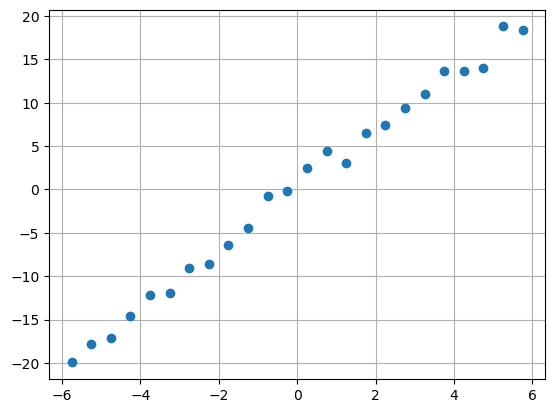

In [10]:
# let's look at this using xc and yc

xc=x-x.mean()
yc=y-y.mean()

plt.plot(xc,yc,'o')
plt.grid()

Notice that only difference in the two plots is the intercept

The relationship between yc and xc is identical to that between y and x,   the centering didn't alter the slope

In [11]:
from sklearn.linear_model import LinearRegression

#create an instance of a linear model using sklearn

lin_mod=LinearRegression()

# fit the model to x, y
# not the reshape of x required here,  converting it from a row matrix to a column matrix

lin_mod.fit(x.reshape(-1,1),y)


LinearRegression()

In [12]:
#what did that reshape do?
x.reshape(-1,1)

array([[-2. ],
       [-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ],
       [ 3.5],
       [ 4. ],
       [ 4.5],
       [ 5. ],
       [ 5.5],
       [ 6. ],
       [ 6.5],
       [ 7. ],
       [ 7.5],
       [ 8. ],
       [ 8.5],
       [ 9. ],
       [ 9.5]])

In [13]:
# what was x prior to the reshape?
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,
        9. ,  9.5])

Okay that makes sense to get from a row format to a column it is reshape(-1,1)

May want to tinker with that a bit more

What is the slope of the linear model?

In [14]:
print(lin_mod.coef_)
print(lin_mod.intercept_)

[3.39234143]
-3.457859875287994


What about a model based on xc and yc

What slope will be get>

In [15]:
lin_modc=LinearRegression()

# fit the model to xc, yc
# not the reshape of x required here,  converting it from a row matrix to a column matrix

lin_modc.fit(xc.reshape(-1,1),yc)

print(lin_modc.coef_)
print(lin_modc.intercept_)

[3.39234143]
0.0


In [16]:
#What happens when we use xc to predict y

lin_modc2=LinearRegression()

# fit the model to xc, y
# not the reshape of x required here,  converting it from a row matrix to a column matrix

lin_modc2.fit(xc.reshape(-1,1),y)

print(lin_modc2.coef_)
print(lin_modc2.intercept_)

[3.39234143]
9.263420504186838


In [18]:
# What about covariation or correlation of x and y - more coming on covariation and correlation
# note we are getting the entire variance-covariance matrix from this output

print(np.cov(x,y))
print(np.cov(xc,yc))

[[ 12.5         42.40426793]
 [ 42.40426793 144.86890517]]
[[ 12.5         42.40426793]
 [ 42.40426793 144.86890517]]


In [19]:
# working with correlation is also helpful at times,   correlation is the covariance rescaled by standard deviations

print(np.corrcoef(x,y))
print(np.corrcoef(xc,yc))


# the R^2 measure of performance often used in assessing is just the squared correlation of x and y, so
# the R^2 will be the same for the three relationships, y to x, yc to xc,  y to xc

[[1.        0.9964763]
 [0.9964763 1.       ]]
[[1.        0.9964763]
 [0.9964763 1.       ]]


# Summary

If we are using x as a predictor,  using xc instead

-may simplify some calculations

-gives the same slope in linear models

-changing from x to xc and/or y to yc does not alter covariation or correlation

Take away point-  if x is a predictor, then so is xc,  and both predict y equally well (or yc for that matter)


# Standardized data

It is also common to standardize data by dividing xc through by the standard deviation (sd) which is the square root of variance

    xs= xc/sd(xc)
    
for a model like

    yc= m xc
    
    yc/sd(xc) =  m xc/sd(xc)
    
    yc/sd(xc) = m xs
    
    yc= (m * sd(xc))  xs
    
 this means that if xc is good predictor of yc,   sx, the standardized version will be as well.    The slope does change, it 
 becomes m * sd(xc),  but the fraction of the variance in y  explained by xs will stay the same, as well the correlation
 
 All measures of the performance of the model will be unchanged,  the scale of xs and of the coefficients do change.
 
Changing from xc to xs is like measuring lengths in feet vs miles, changing units can't alter any relationships involved.

In [20]:
xs=xc/np.var(xc)**0.5

In [21]:
# the variance should now be 1,  and sd is the square root of variance, so it will be 1 as well

np.var(xs)

1.0

In [23]:
xs.mean()

-3.700743415417188e-17

In [24]:
# correlation is changed
print(np.corrcoef(xs, y))
print(np.corrcoef(x,y))

# the R^2 for y to x and y to xs is the same,  x and xs have the same predictive power

[[1.        0.9964763]
 [0.9964763 1.       ]]
[[1.        0.9964763]
 [0.9964763 1.       ]]


# Conclusion

If x is predictor,  xs is also, with the same predictive power

-the intercepts and sloped do change,   as does the covariance

-the correlation does not change

-predictive power does not change

Why use "Standard Scaling?"

Rounding errors are the smallest in computers when the floating point values are all close to zero,  in the range -1 to 1,
or -10 to 10

Standard scaling forces all the values to be close to zero,  which reduces numerical errors.

Many modeling packages require standard scaling,   it is typically good practice



# Normalization

This is typically done by dividing x by the range of values in x

    xnorm = x/(max(x) - min (x))
    
which forces xnorm to range from zero to 1

the correlation of xnorm with y will be the same as x with y,  so if
x is a good predictor of y,  xnorm will be equally good

xnorm is just a scaled version of x,  it's like changing units again, just as with standization

Normalization is helpful if the output is a probability in the range 0 to 1,  that requirement is one type of normalization.



In [25]:
xn=x/(x.max()-x.min())

In [26]:
print(np.corrcoef(x,y))
print(np.corrcoef(xn,y))

[[1.        0.9964763]
 [0.9964763 1.       ]]
[[1.        0.9964763]
 [0.9964763 1.       ]]


In [29]:
xn.mean()

0.3260869565217392